In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.decomposition import PCA

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Read dataset for exploratory analysis

In [3]:
data = pd.read_csv('train_loan_data (1).csv')
data.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


# Let us try to understand the dataset

In [4]:
# Shape command will give the number of rows and columns present in the dataset

data.shape

(80000, 28)

We have 80,000 rows and 28 columns in our dataset

In [5]:
#The info command will help us to understand the different columns present in the dataset and its datatype

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [6]:
data.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


# Exploratory data analysis

                                             |          | [  0%]   00:00 -> (? left)

Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



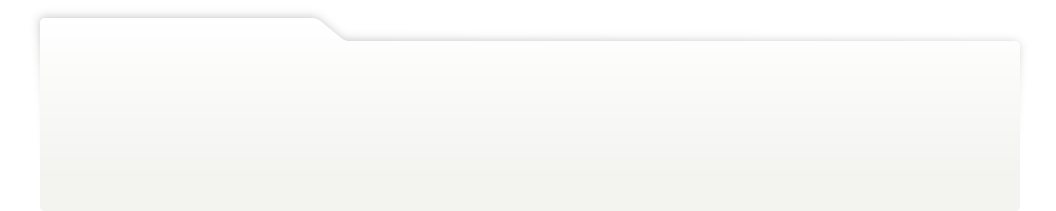
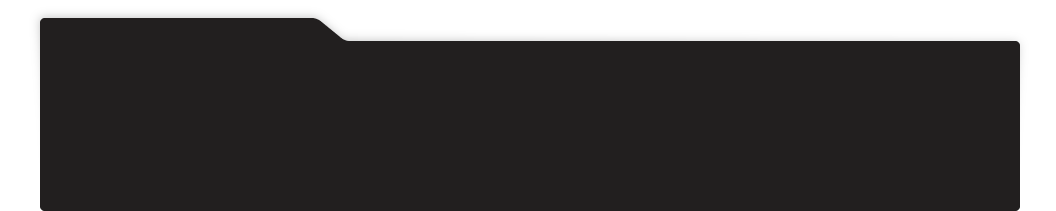
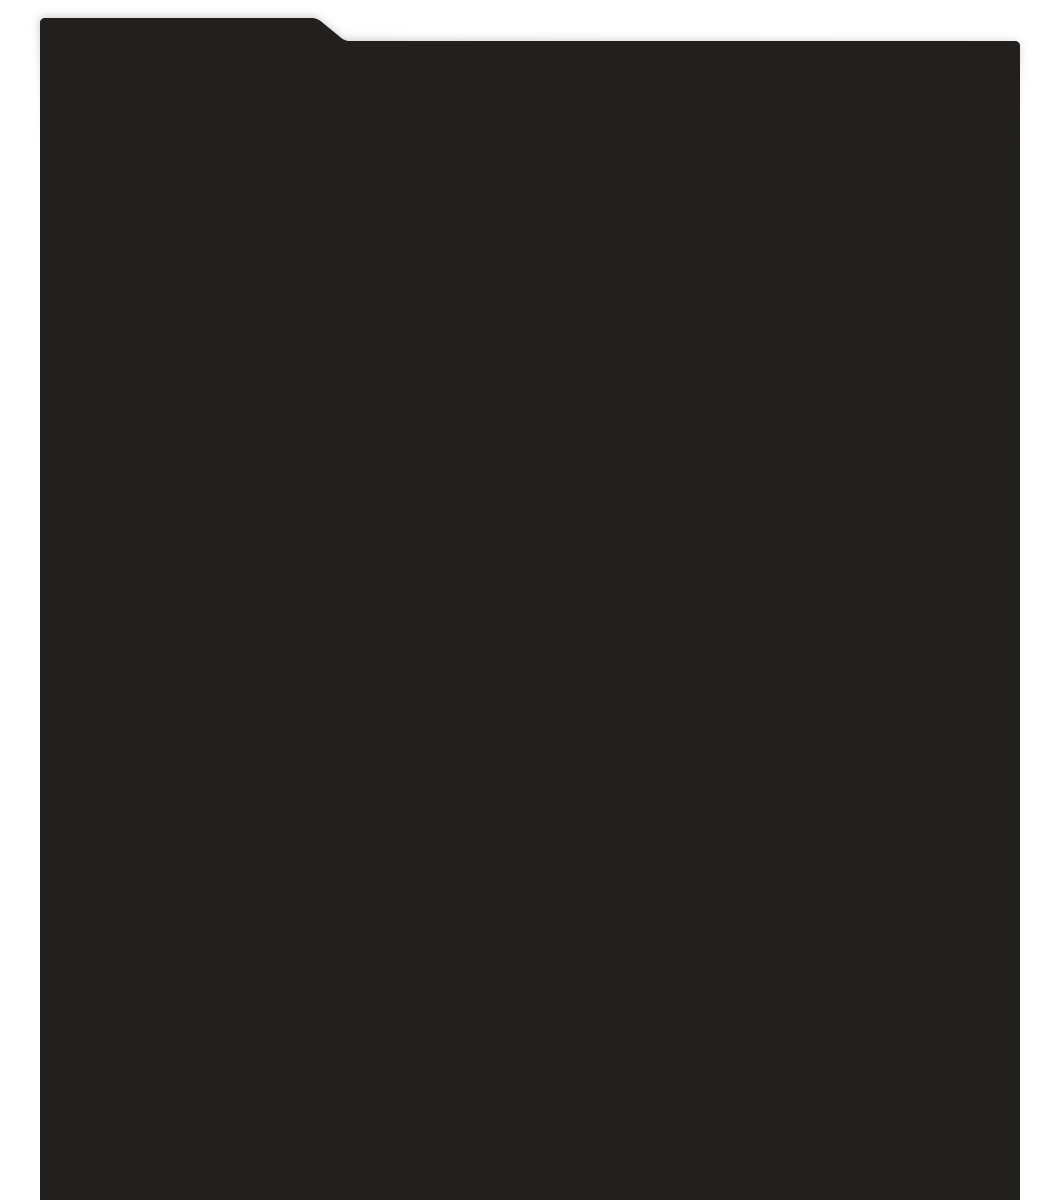
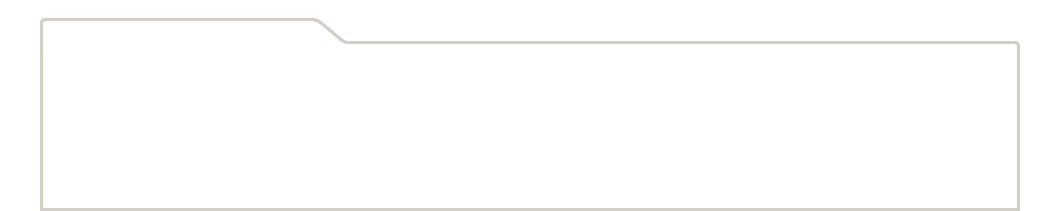
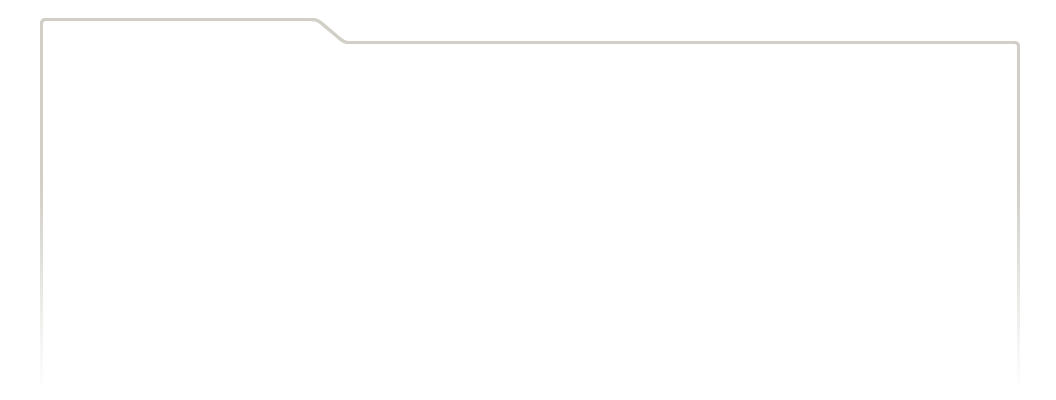
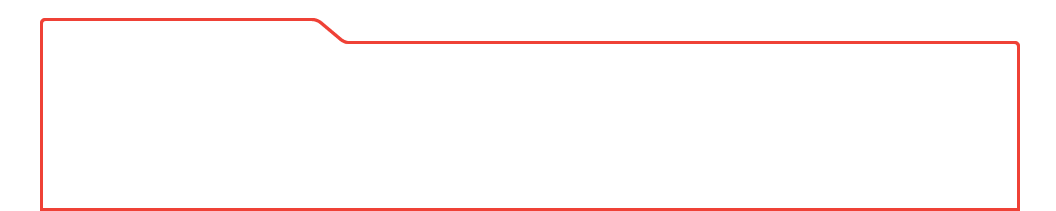
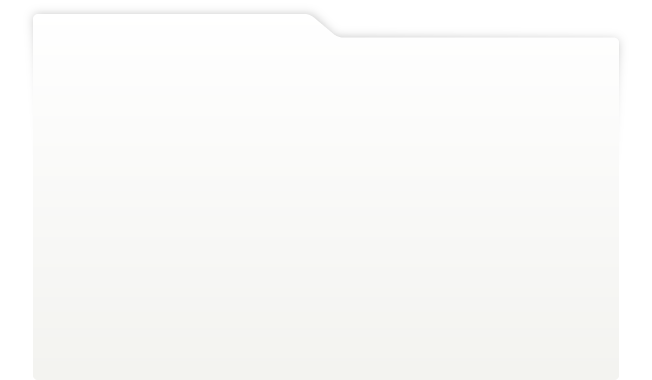
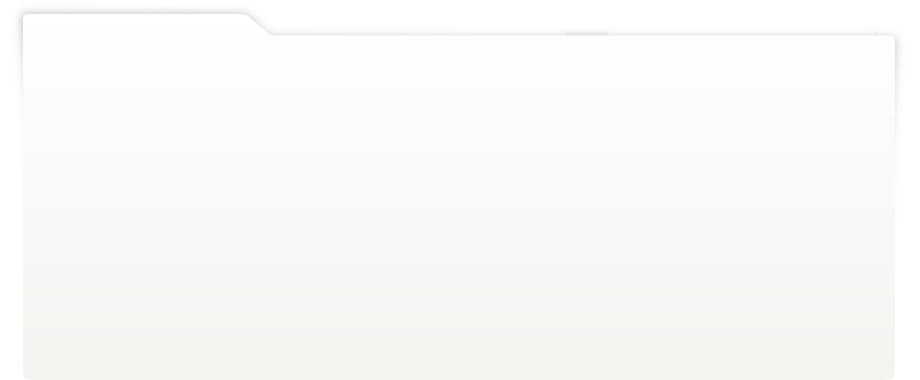
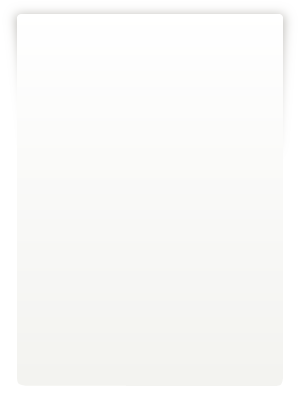
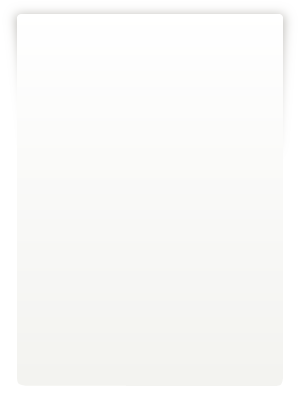
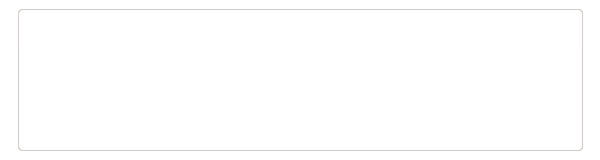
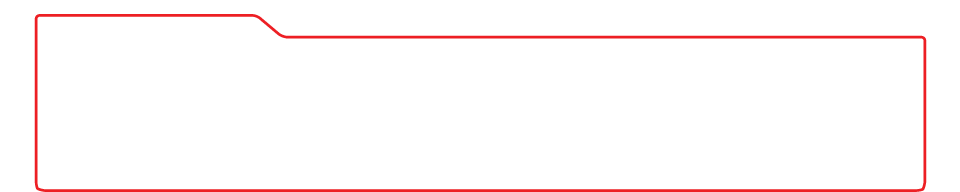
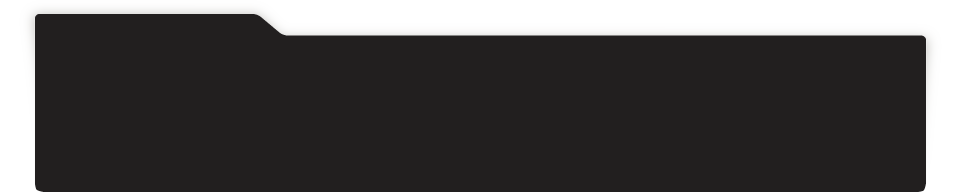
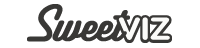
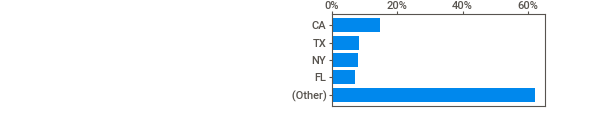
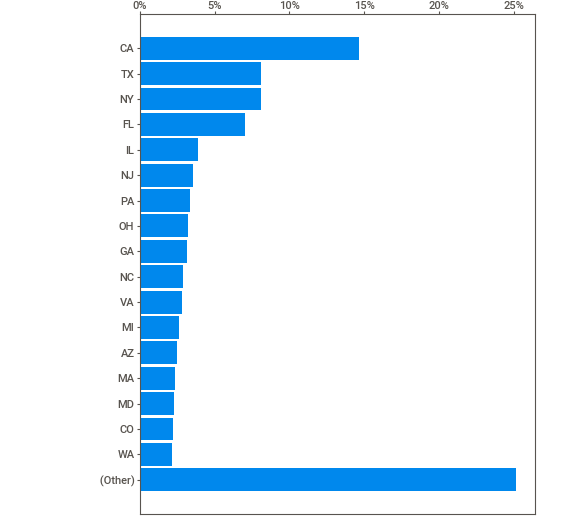
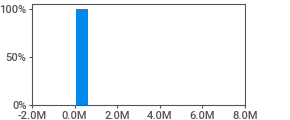
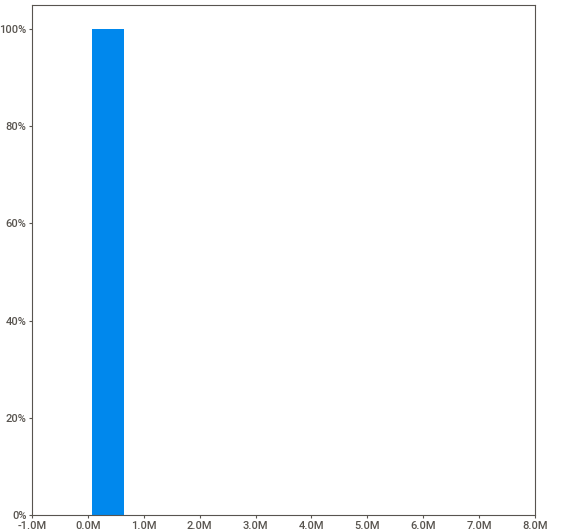
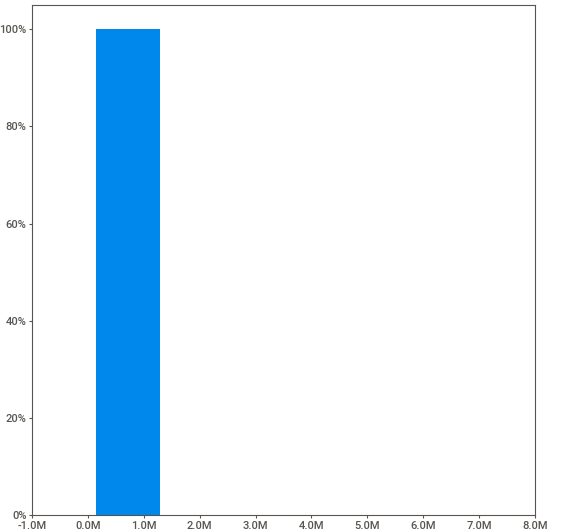
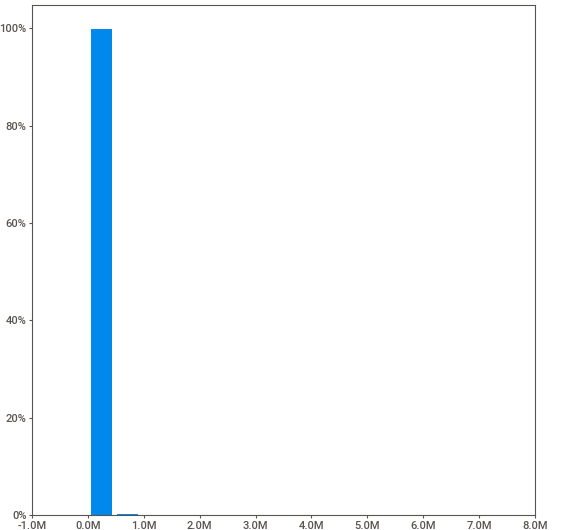
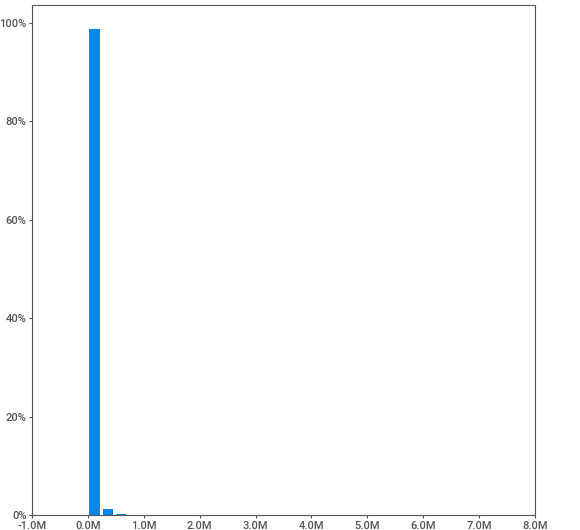
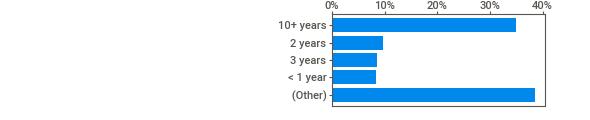
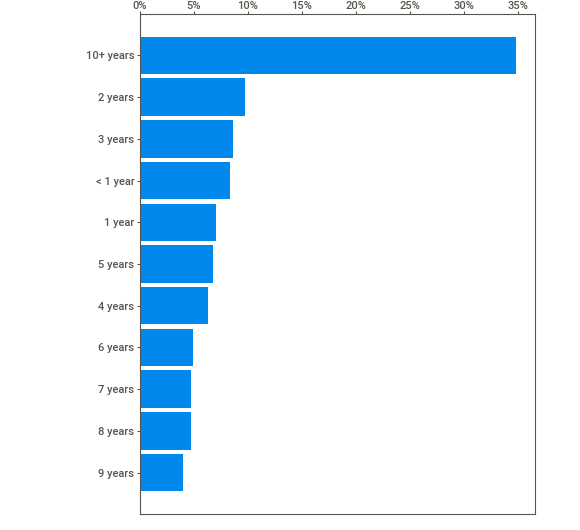
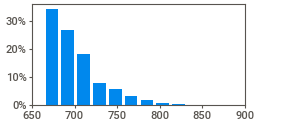
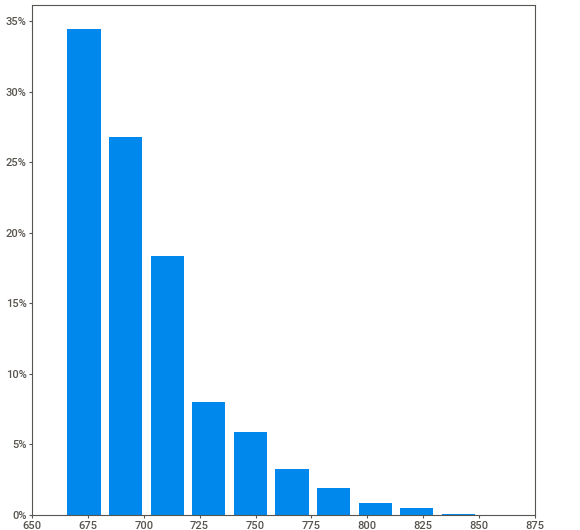
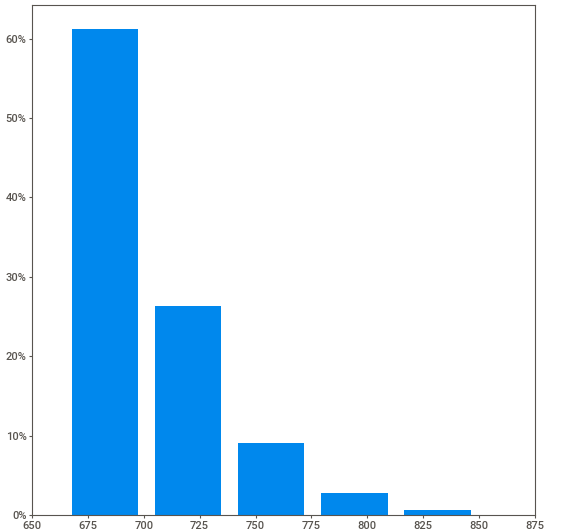
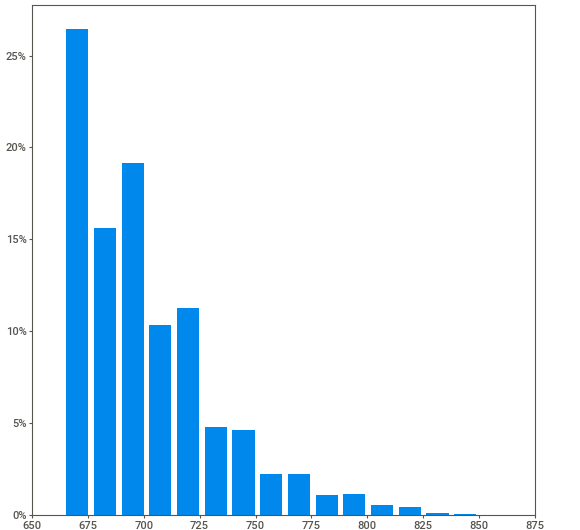
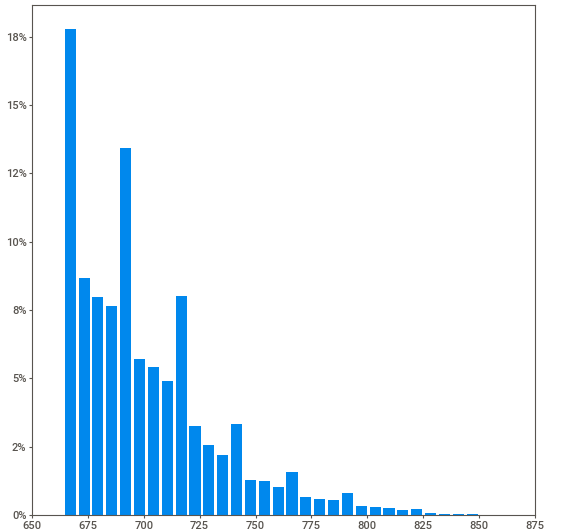
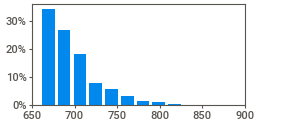
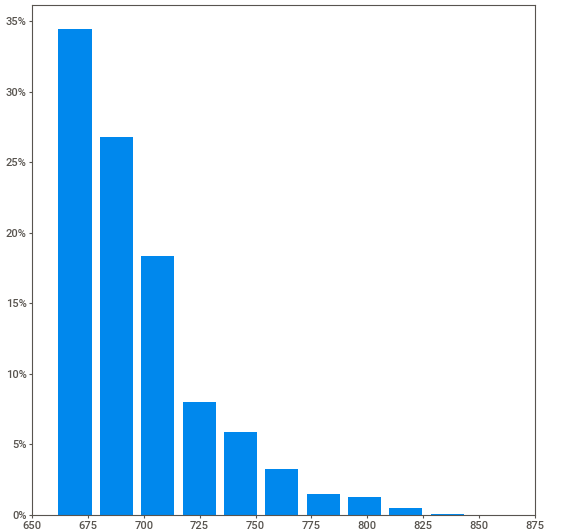
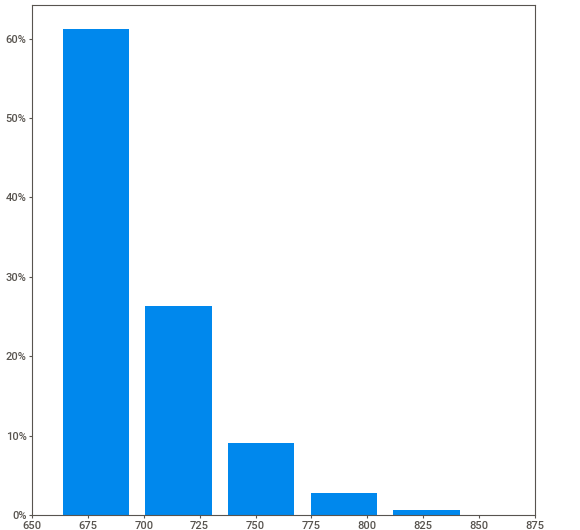
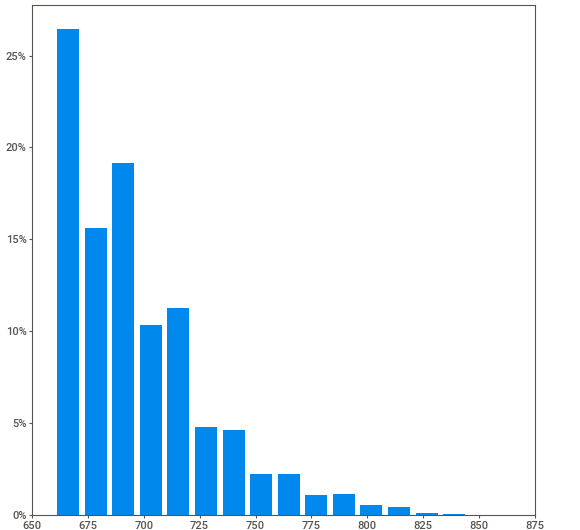
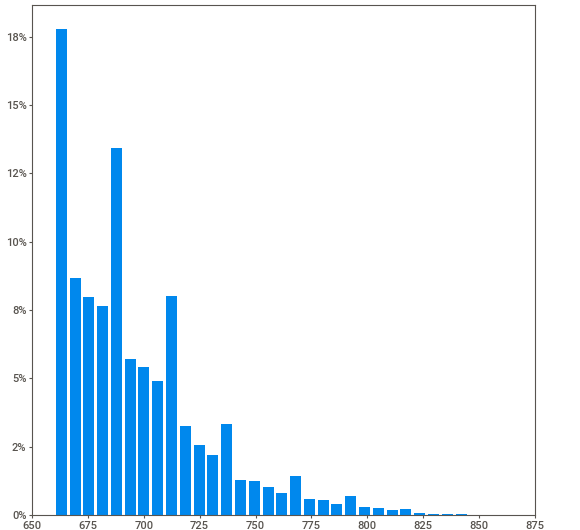
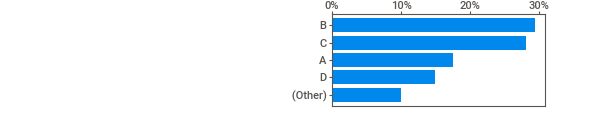
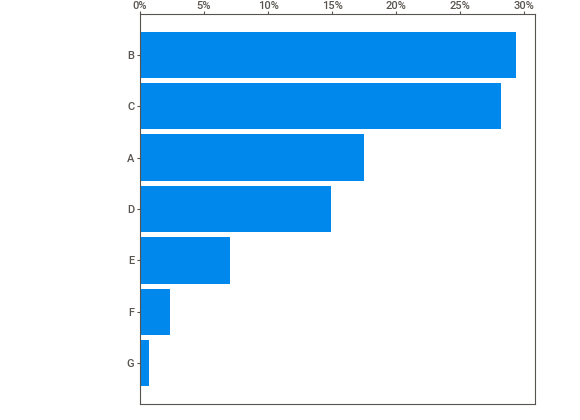
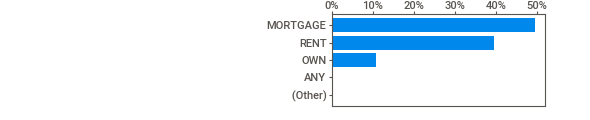
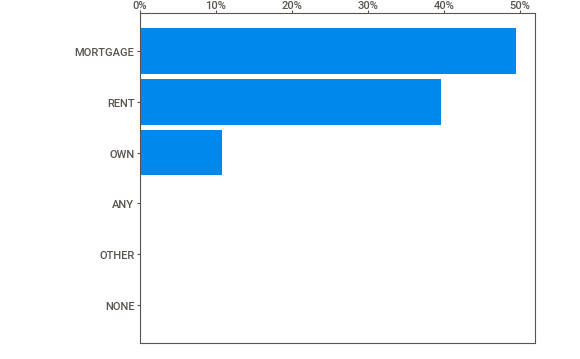
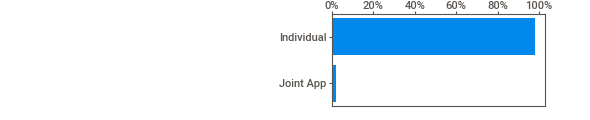
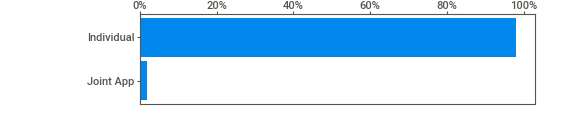
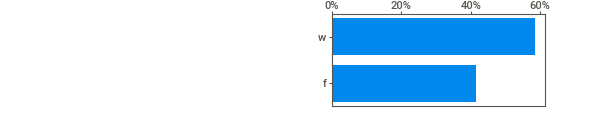
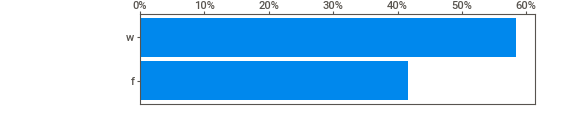
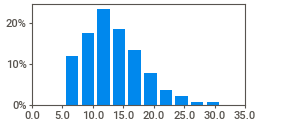
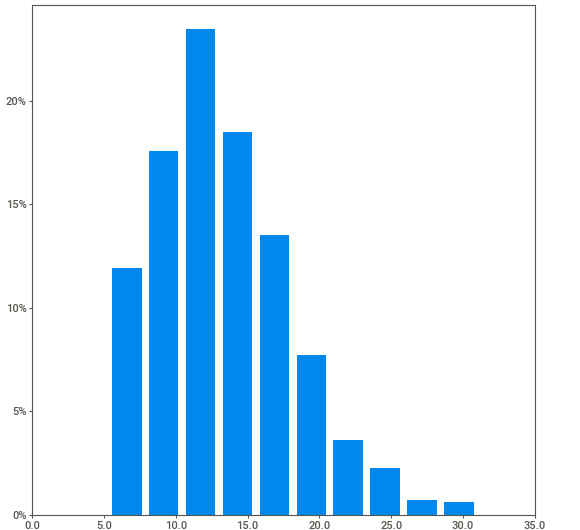
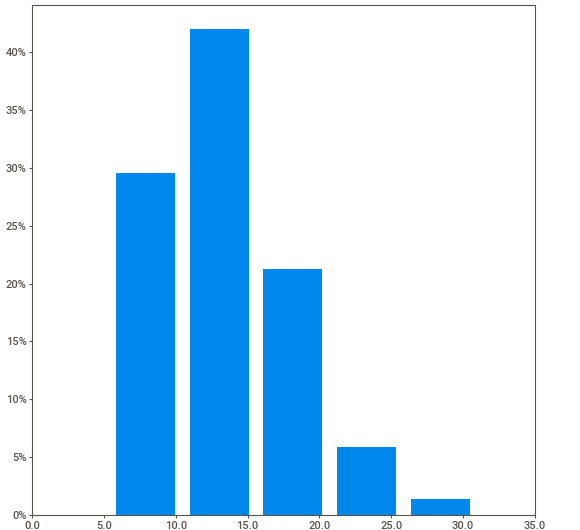
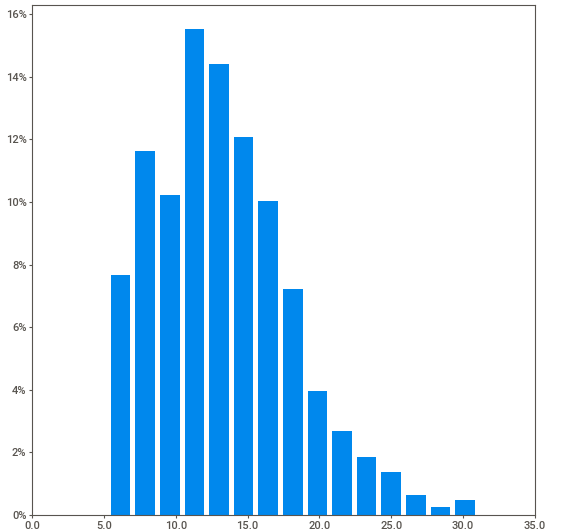
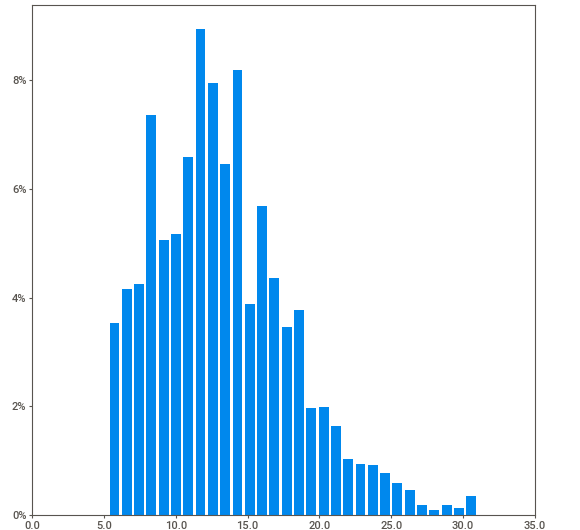
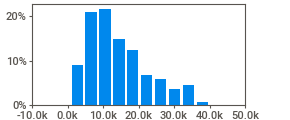
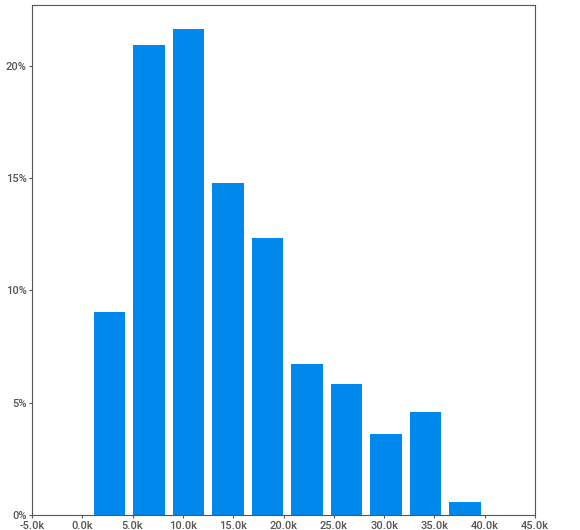
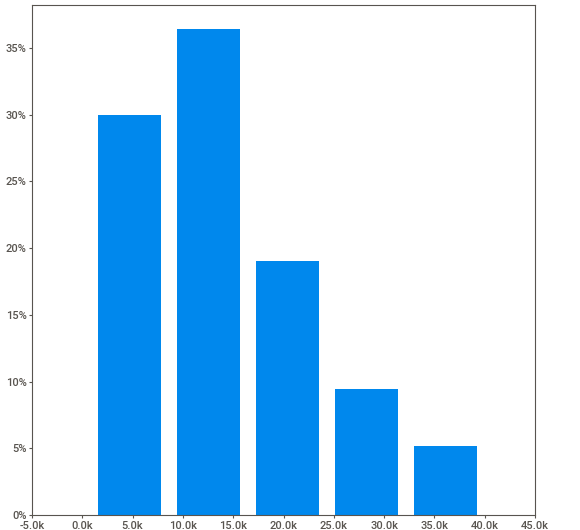
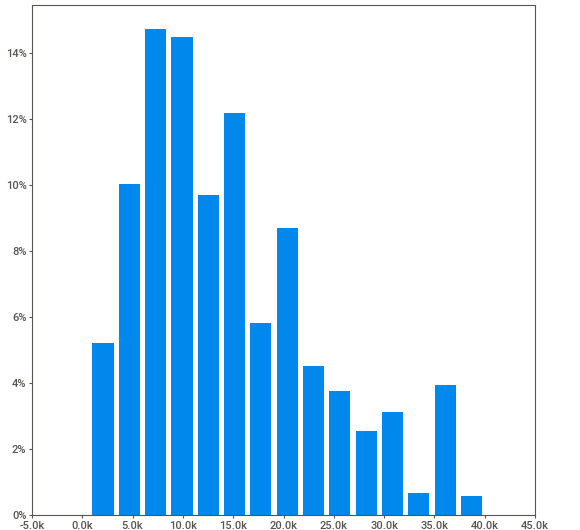
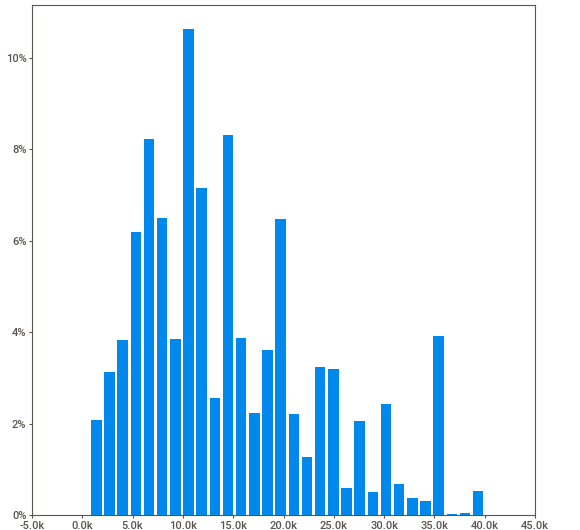
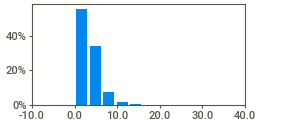
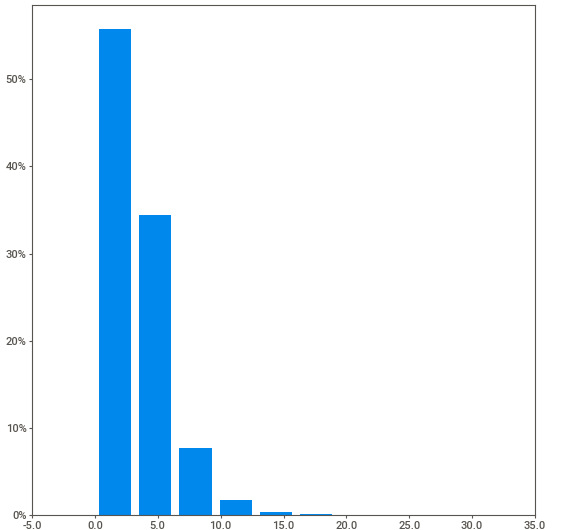
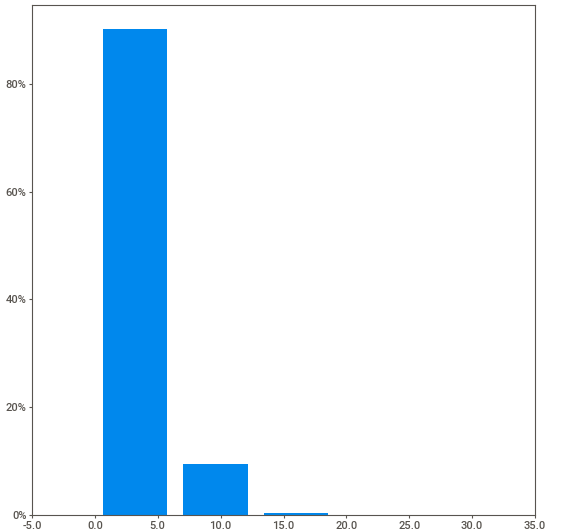
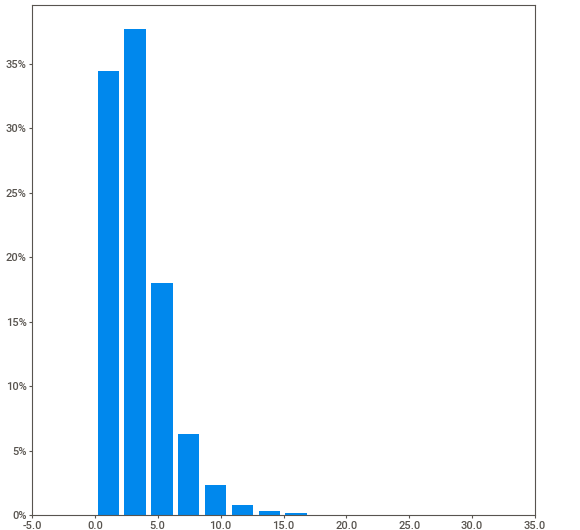
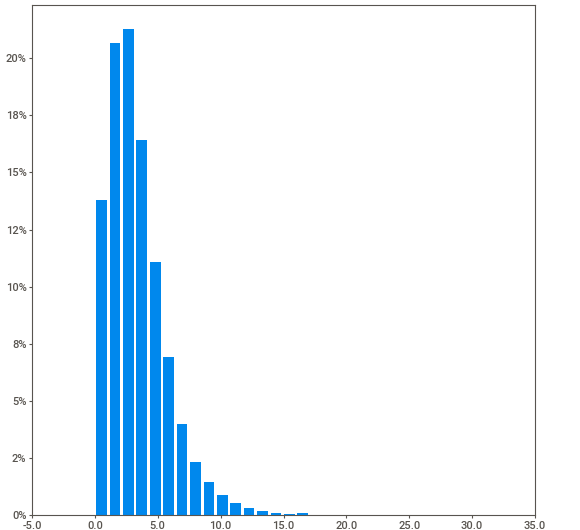
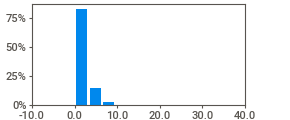
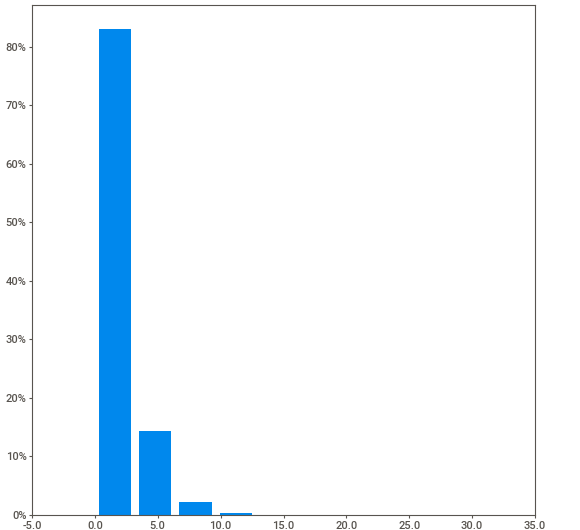
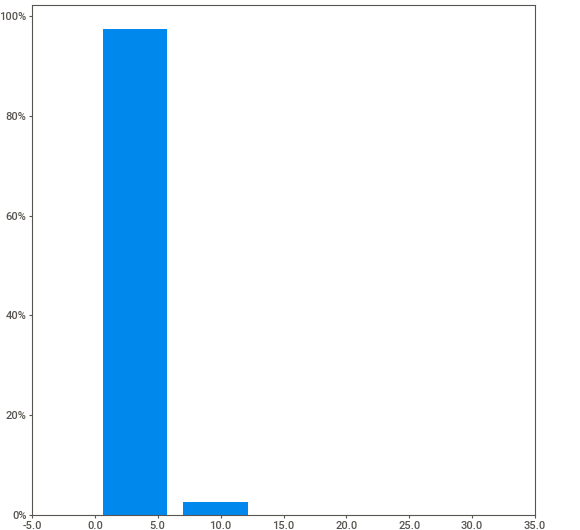
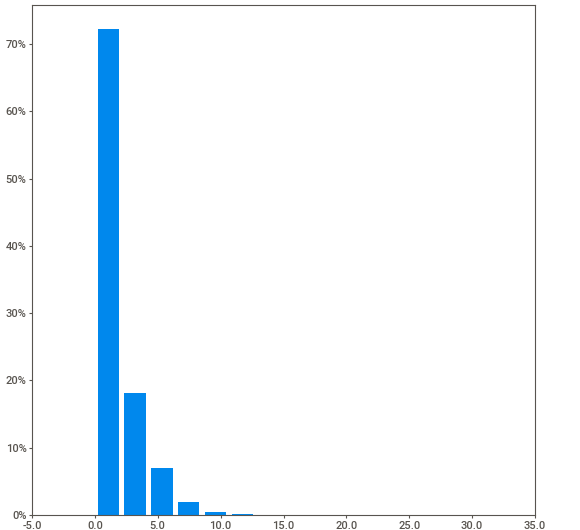
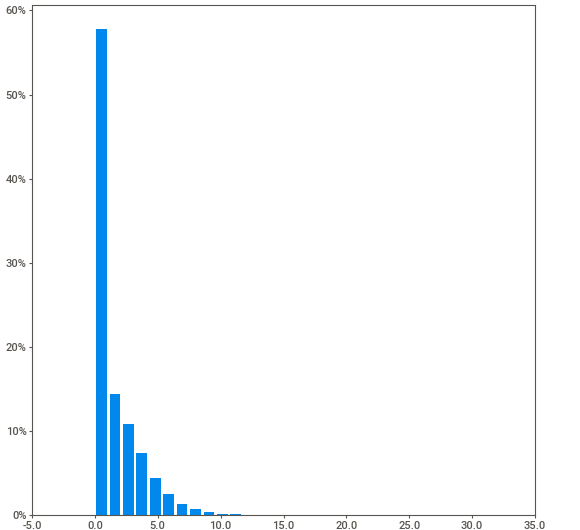
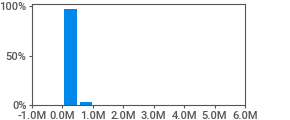
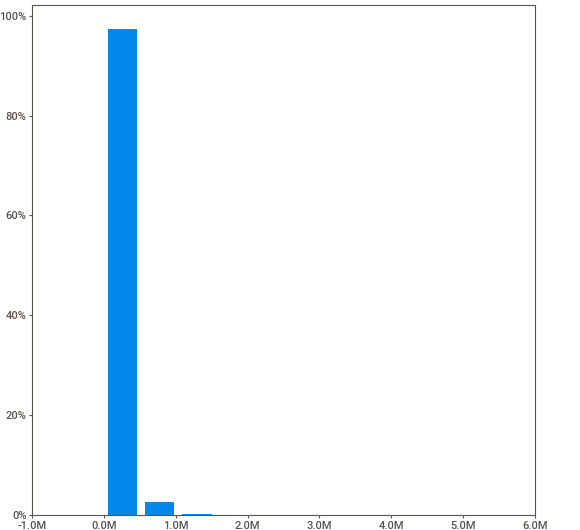
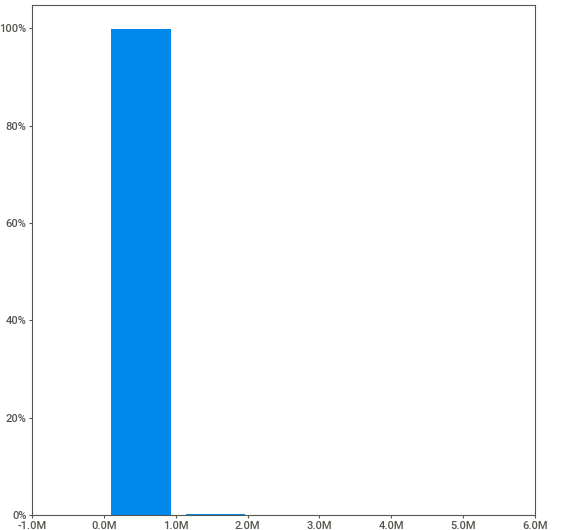
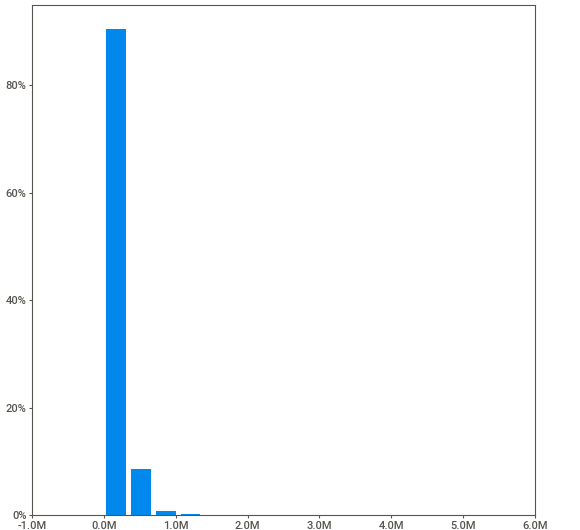
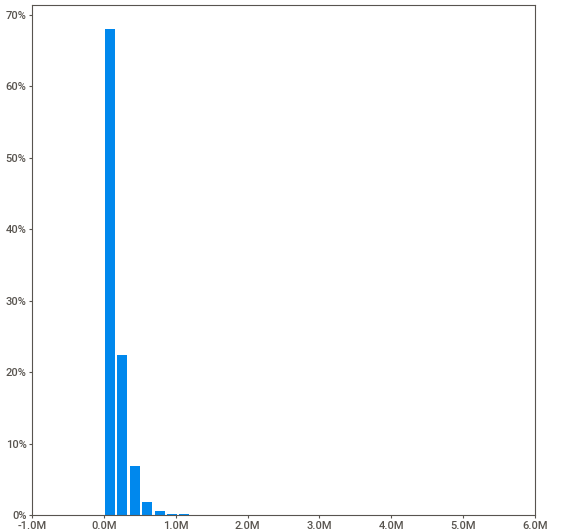
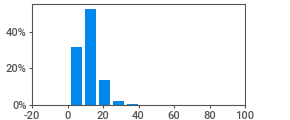
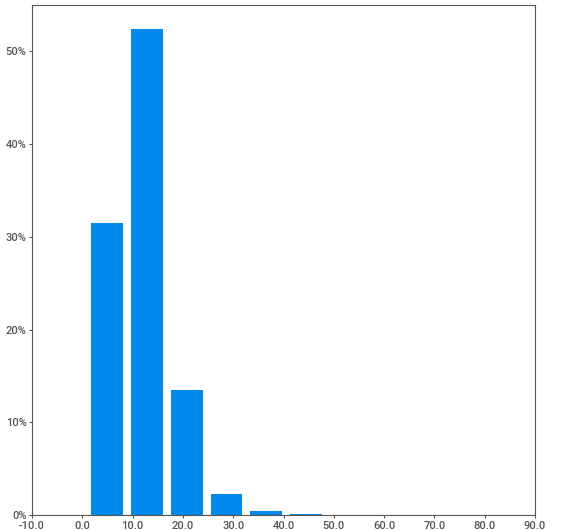
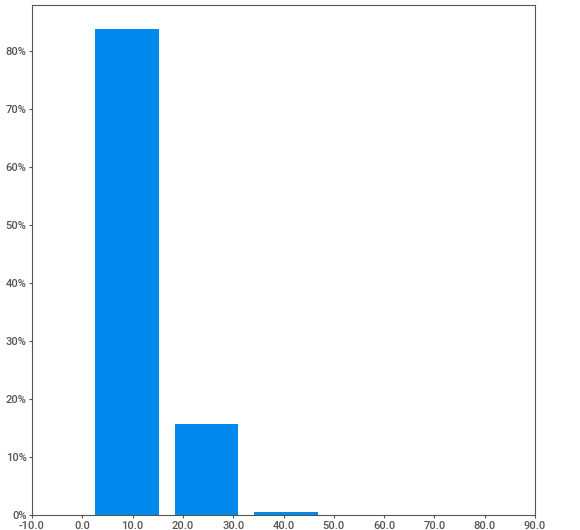
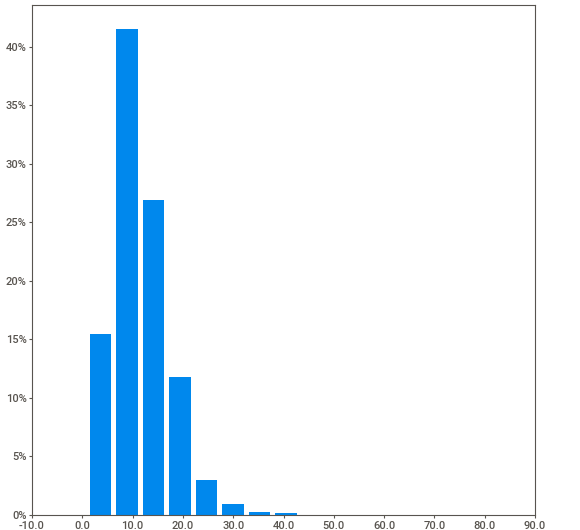
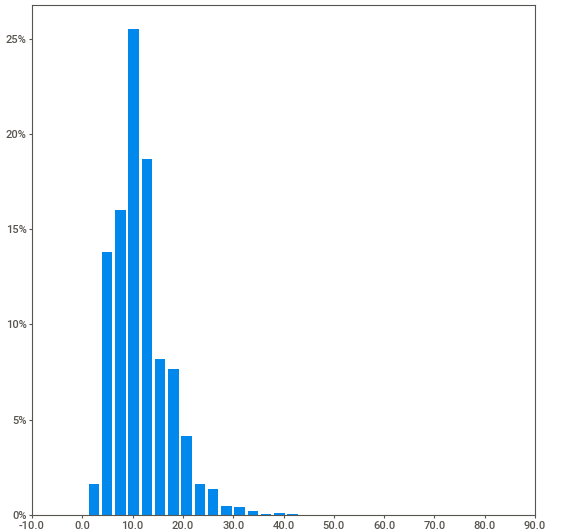
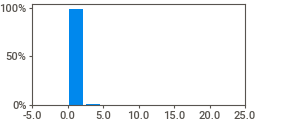
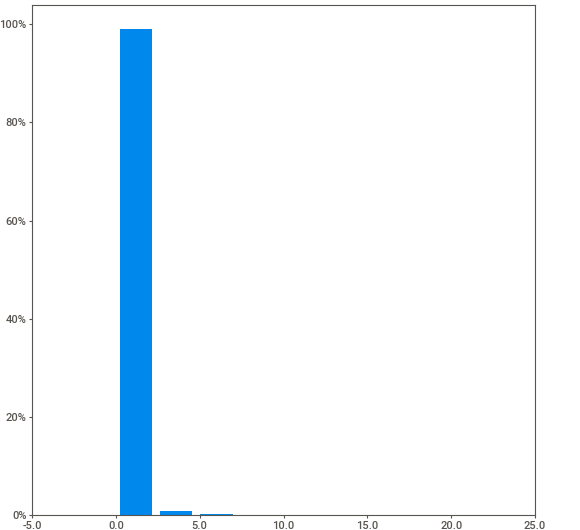
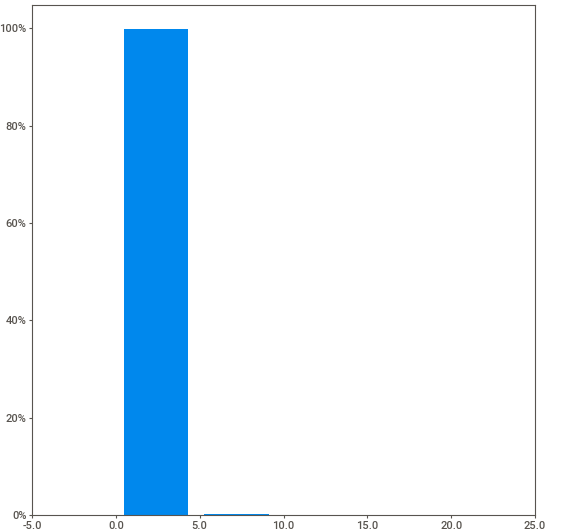
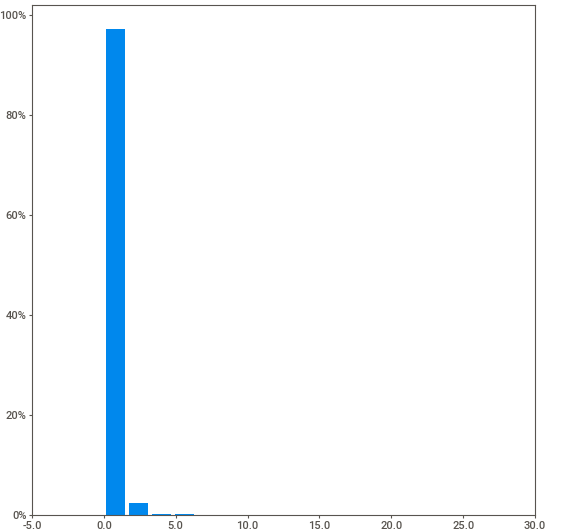
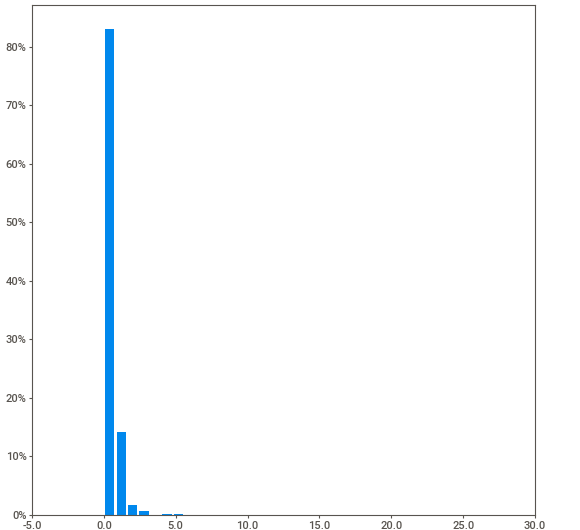
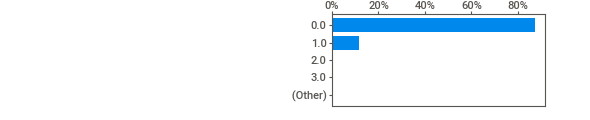
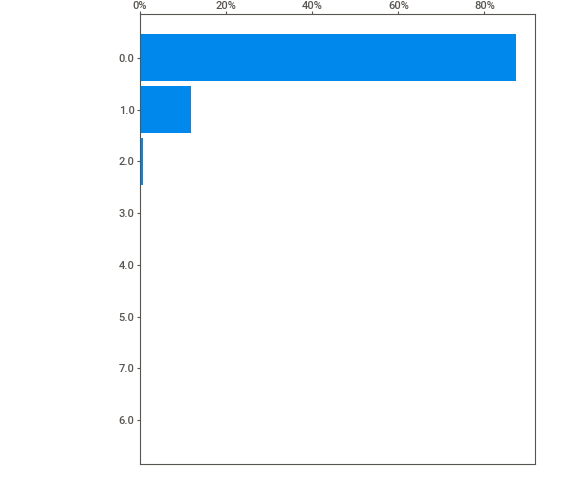
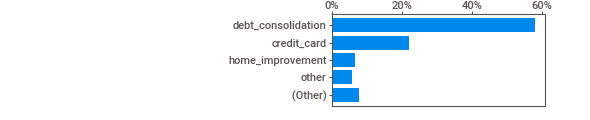
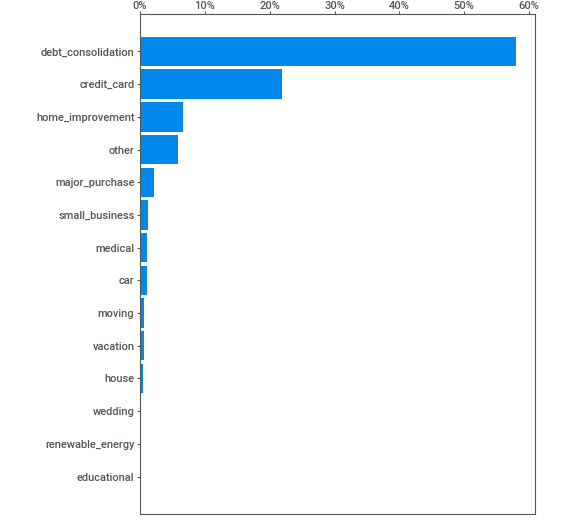
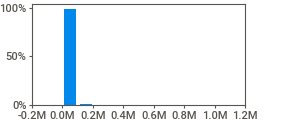
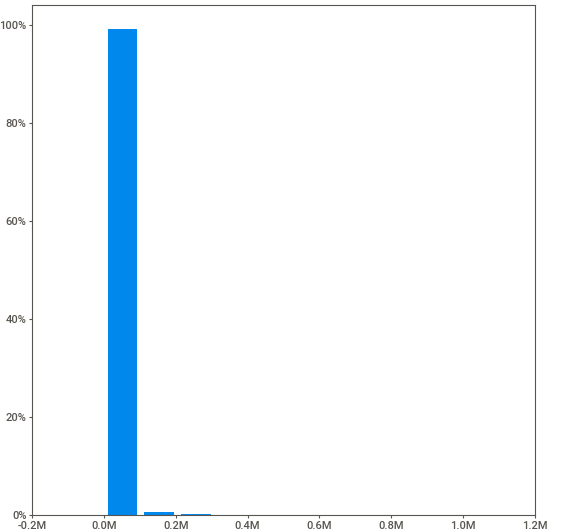
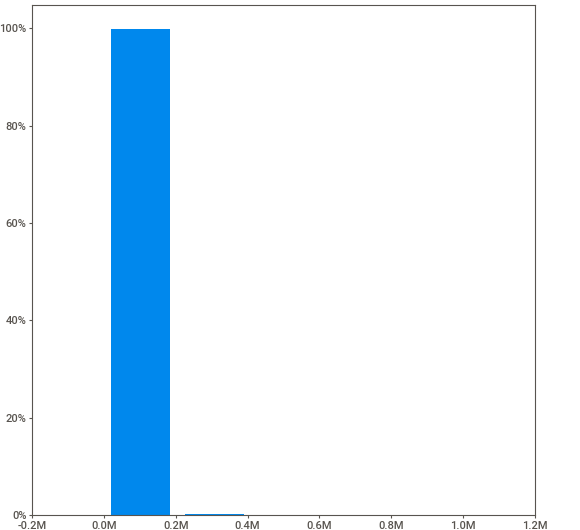
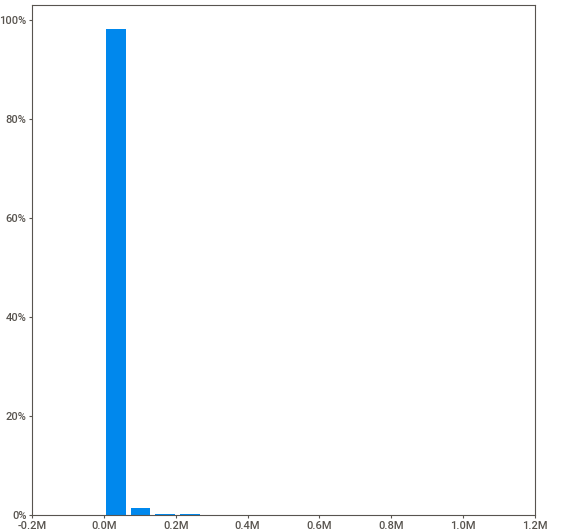
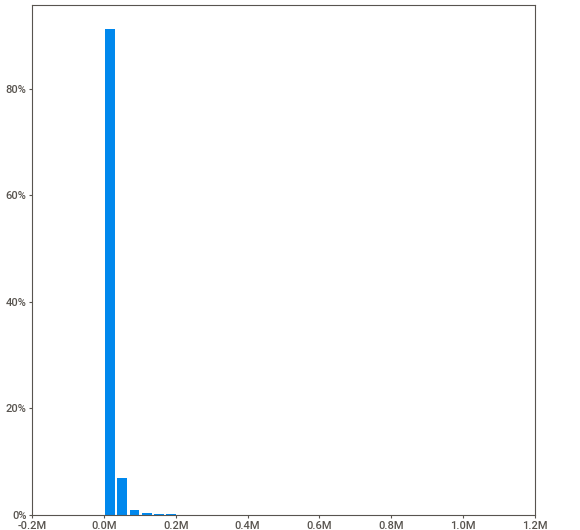
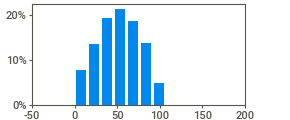
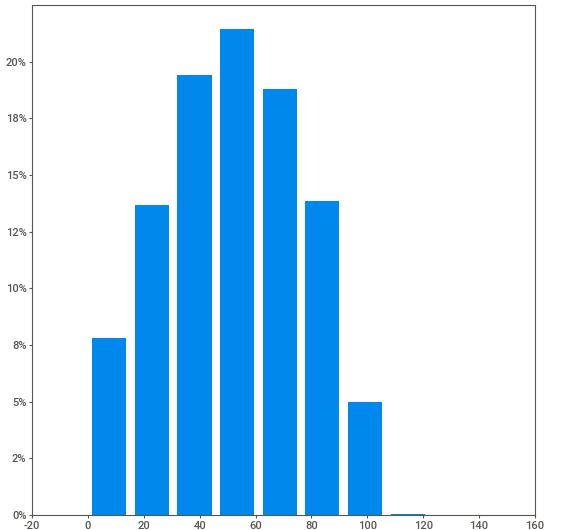
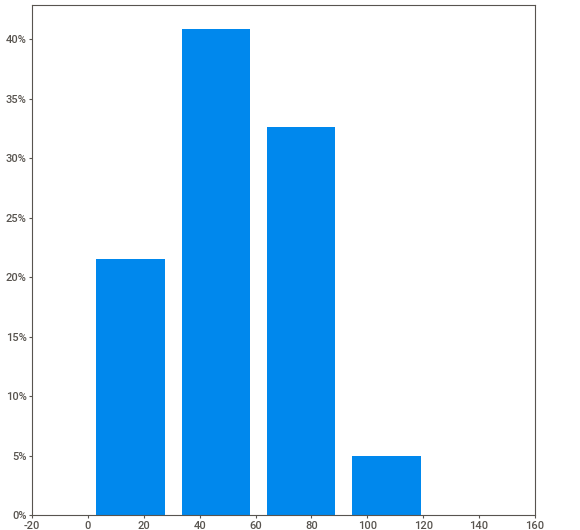
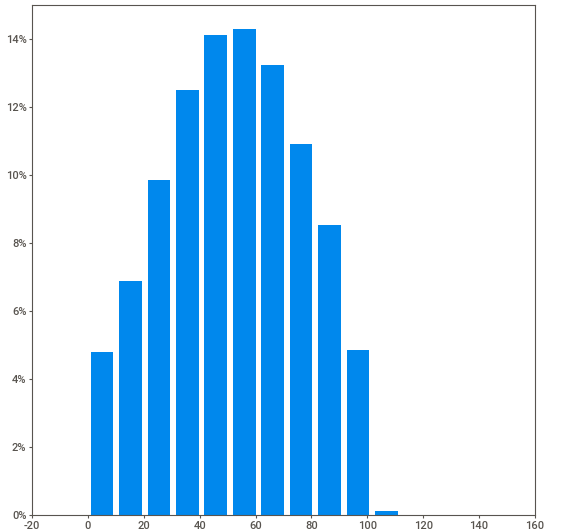
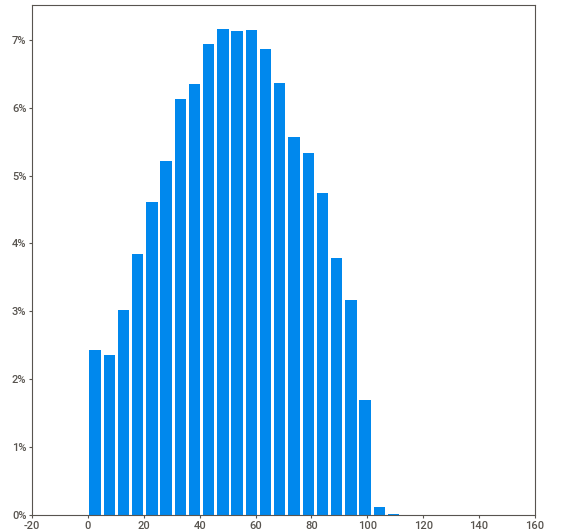
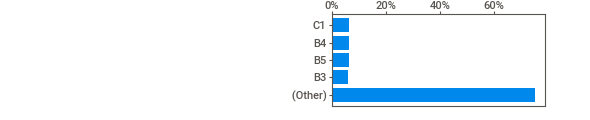
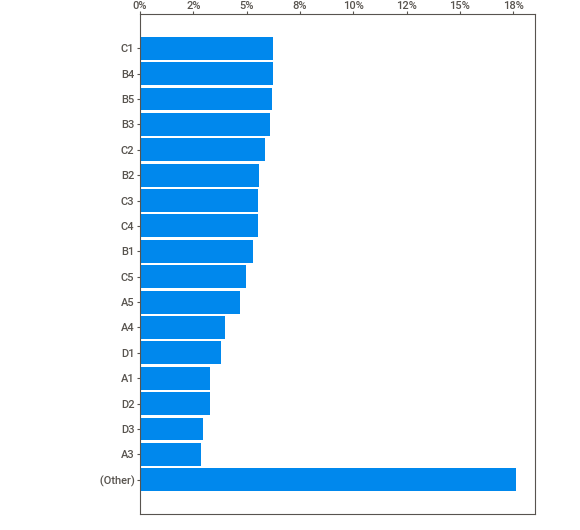
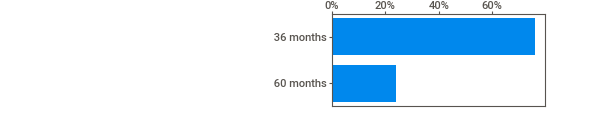
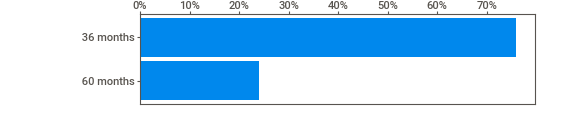
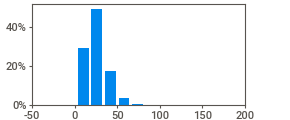
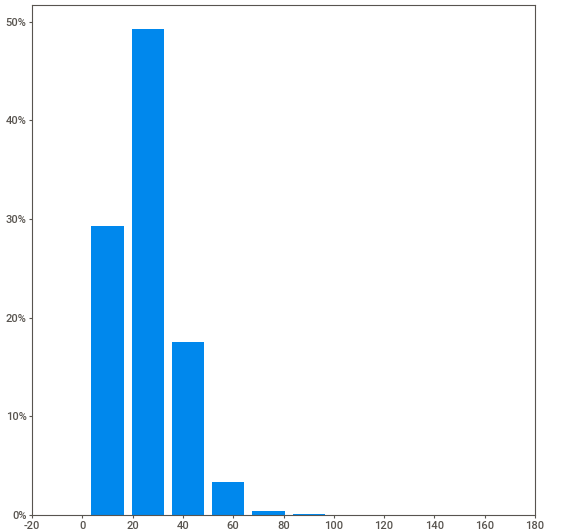
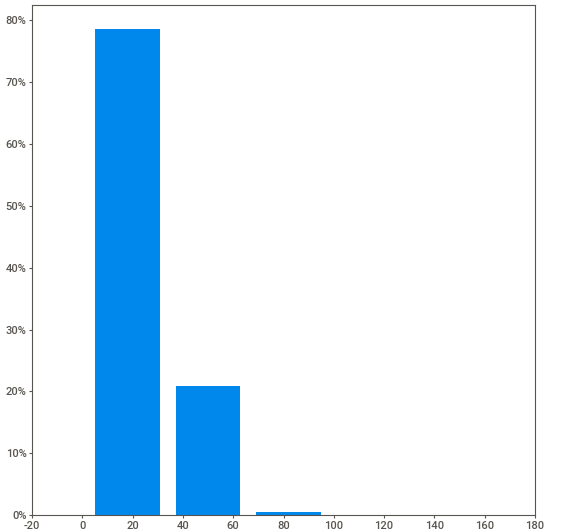
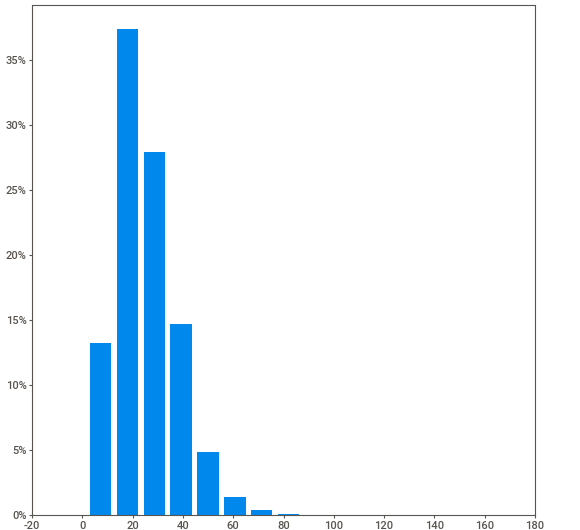
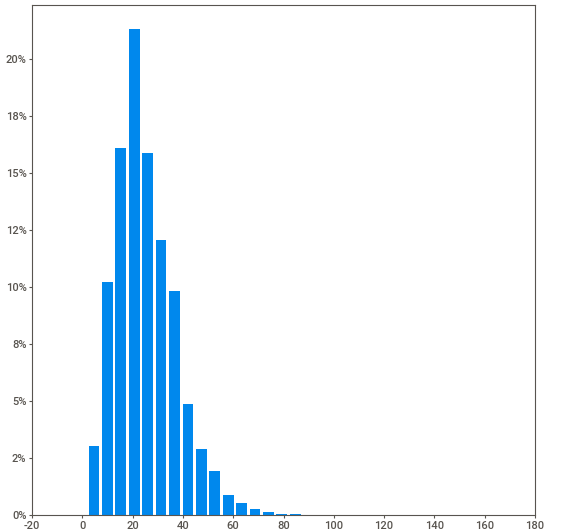
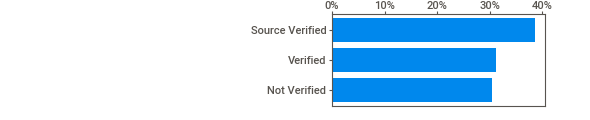
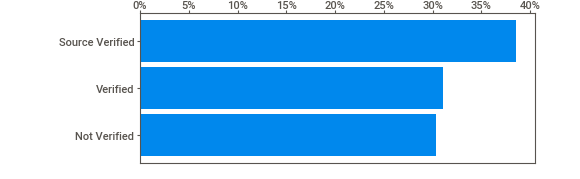
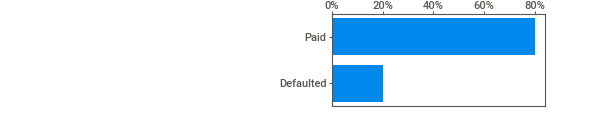
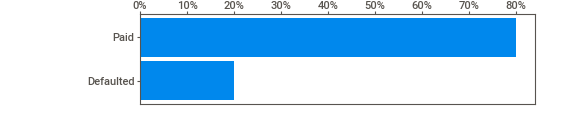
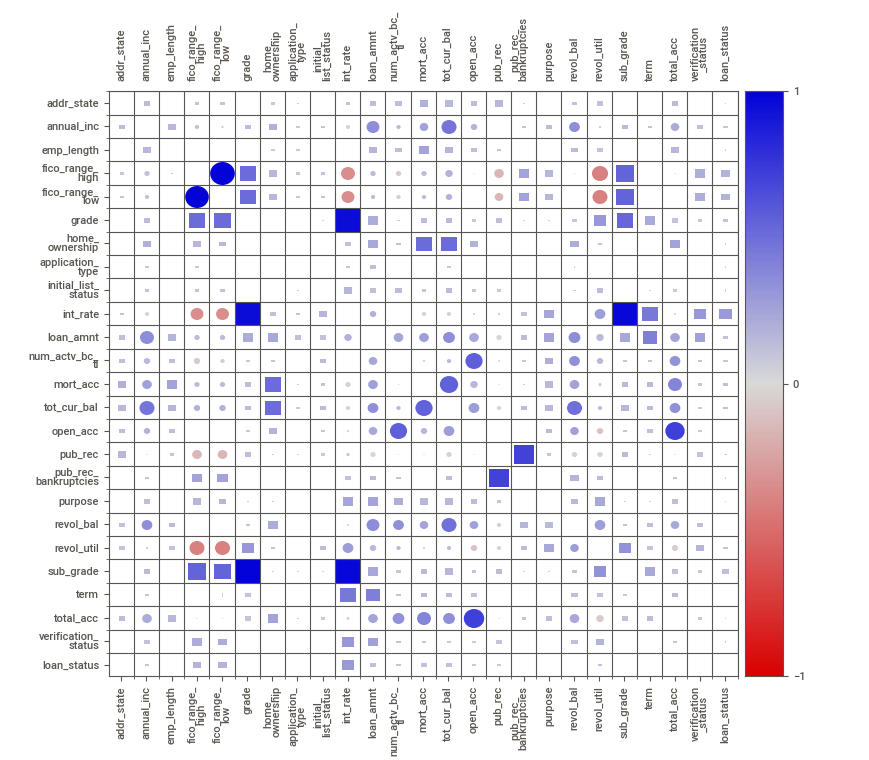
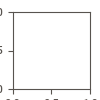

In [7]:
# Let us run sweetviz for exploratory data analysis

eda = sv.analyze(data)
eda.show_html('eda.html')
eda.show_notebook()

# Check missing values

In [10]:
# Find the missing values

data.isnull().sum()* 100 / len(data)

addr_state              0.00000
annual_inc              0.00000
earliest_cr_line        0.00000
emp_length              5.73500
emp_title               6.27250
fico_range_high         0.00000
fico_range_low          0.00000
grade                   0.00000
home_ownership          0.00000
application_type        0.00000
initial_list_status     0.00000
int_rate                0.00000
loan_amnt               0.00000
num_actv_bc_tl          4.93500
mort_acc                3.46375
tot_cur_bal             4.93500
open_acc                0.00000
pub_rec                 0.00000
pub_rec_bankruptcies    0.03875
purpose                 0.00000
revol_bal               0.00000
revol_util              0.06625
sub_grade               0.00000
term                    0.00000
title                   1.21250
total_acc               0.00000
verification_status     0.00000
loan_status             0.00000
dtype: float64

In [15]:
# Replace missing values from columns with object datatype with the mode

colso = ['emp_length','emp_title','num_actv_bc_tl','mort_acc','tot_cur_bal','pub_rec_bankruptcies','revol_util','title']
for col in colso:
    data[col].fillna(data[col].mode()[0],inplace=True)

In [16]:
# Check for missing values again

data.isnull().sum()* 100 / len(data)

addr_state              0.0
annual_inc              0.0
earliest_cr_line        0.0
emp_length              0.0
emp_title               0.0
fico_range_high         0.0
fico_range_low          0.0
grade                   0.0
home_ownership          0.0
application_type        0.0
initial_list_status     0.0
int_rate                0.0
loan_amnt               0.0
num_actv_bc_tl          0.0
mort_acc                0.0
tot_cur_bal             0.0
open_acc                0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
purpose                 0.0
revol_bal               0.0
revol_util              0.0
sub_grade               0.0
term                    0.0
title                   0.0
total_acc               0.0
verification_status     0.0
loan_status             0.0
dtype: float64

In [17]:
data.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [18]:
# Let us check the number of unique values in each column

data.nunique()

addr_state                 51
annual_inc               7536
earliest_cr_line          640
emp_length                 11
emp_title               36661
fico_range_high            38
fico_range_low             38
grade                       7
home_ownership              6
application_type            2
initial_list_status         2
int_rate                  549
loan_amnt                1373
num_actv_bc_tl             28
mort_acc                   28
tot_cur_bal             65410
open_acc                   56
pub_rec                    15
pub_rec_bankruptcies        8
purpose                    14
revol_bal               32971
revol_util               1080
sub_grade                  35
term                        2
title                    5348
total_acc                 107
verification_status         3
loan_status                 2
dtype: int64

In [19]:
# Let us list the datatype for each column against the number of unique values

list(zip(data.columns,data.dtypes,data.nunique()))

[('addr_state', dtype('O'), 51),
 ('annual_inc', dtype('float64'), 7536),
 ('earliest_cr_line', dtype('O'), 640),
 ('emp_length', dtype('O'), 11),
 ('emp_title', dtype('O'), 36661),
 ('fico_range_high', dtype('int64'), 38),
 ('fico_range_low', dtype('int64'), 38),
 ('grade', dtype('O'), 7),
 ('home_ownership', dtype('O'), 6),
 ('application_type', dtype('O'), 2),
 ('initial_list_status', dtype('O'), 2),
 ('int_rate', dtype('float64'), 549),
 ('loan_amnt', dtype('int64'), 1373),
 ('num_actv_bc_tl', dtype('float64'), 28),
 ('mort_acc', dtype('float64'), 28),
 ('tot_cur_bal', dtype('float64'), 65410),
 ('open_acc', dtype('int64'), 56),
 ('pub_rec', dtype('int64'), 15),
 ('pub_rec_bankruptcies', dtype('float64'), 8),
 ('purpose', dtype('O'), 14),
 ('revol_bal', dtype('int64'), 32971),
 ('revol_util', dtype('float64'), 1080),
 ('sub_grade', dtype('O'), 35),
 ('term', dtype('O'), 2),
 ('title', dtype('O'), 5348),
 ('total_acc', dtype('int64'), 107),
 ('verification_status', dtype('O'), 3),
 

In [20]:
# Let us format the emp_length column properly and change the datatype to int

data['emp_length'] = data['emp_length'].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
data['emp_length'] = data['emp_length'].apply(lambda x:int(x))

In [21]:
# Let us convert earliest_cr_line column to numeric value

data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'],format='%b-%y')

# Convert datetime format to numeric format

data['earliest_cr_line'] = pd.to_numeric(data['earliest_cr_line'])

In [22]:
# Convert the term column to numeric value

# Remove the 'months' string from the column
data['term'] = data['term'].replace(' months','',regex=True)

# Convert the column to numeric format
data['term'] = pd.to_numeric(data['term'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  int64  
 3   emp_length            80000 non-null  int64  
 4   emp_title             80000 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        80000 non-null  float64
 14  mort_acc              80000 non-null  float64
 15  tot_cur_bal        

In [25]:
# Let us drop addr_state and emp_tittle columns from our dataset
data.drop(['addr_state', 'emp_title'], axis=1, inplace=True)

In [26]:
# Function to separate the numerical and categorical columns

def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = dataset.select_dtypes(include=['int64','float64'])
    categorical = dataset.select_dtypes(include=['object'])
    return numerical, categorical

In [27]:
# Separate numerical and categorical columns

numerical, categorical = data_type(data)

In [28]:
# Function to identify binary columns and ignore them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

In [29]:
# Remove the binary columns from the numerical columns

binary_cols = binary_columns(data)

numerical = [i for i in numerical if i not in binary_cols]

In [30]:
# Function to encode categorical columns

def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

In [31]:
# Encode categorical columns

data = encoding(data, categorical)

In [32]:
# Function to perform feature scaling of numerical data

def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc = StandardScaler()
    dataset[numerical] = sc.fit_transform(dataset[numerical])
    return dataset

In [33]:
data.head()

,annual_inc,earliest_cr_line,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,85000.0,867715200000000000,10,744,740,4,1,0,1,18.99,...,0.0,2,5338,93.6,20,60,1502,8,1,0
1,40000.0,544233600000000000,10,724,720,1,5,0,1,10.16,...,0.0,2,19944,60.3,5,36,1082,12,2,1
2,60000.0,1185926400000000000,10,679,675,1,1,0,1,11.47,...,0.0,2,23199,88.5,9,36,1502,16,1,1
3,100742.0,336614400000000000,10,664,660,1,1,0,1,9.16,...,0.0,2,18425,69.0,6,36,1502,19,1,1
4,80000.0,930787200000000000,10,669,665,5,5,0,0,23.83,...,0.0,2,34370,90.0,29,60,1289,59,2,1


In [34]:
status = data['loan_status'].value_counts()
status


1    64030
0    15970
Name: loan_status, dtype: int64

64,030 customers paid back their loan while 15,970 customers defaulted

In [35]:
# Let us obtain the percentage for each class starting with paid

paid = round((status[1]/data['loan_status'].count()*100),2)
paid

80.04

In [36]:
# Percentage of customers that defaulted

defaulted = round((status[0]/data['loan_status'].count()*100),2)
defaulted

19.96

80 percent of our customers paid back their loan while approximately 20% defaulted

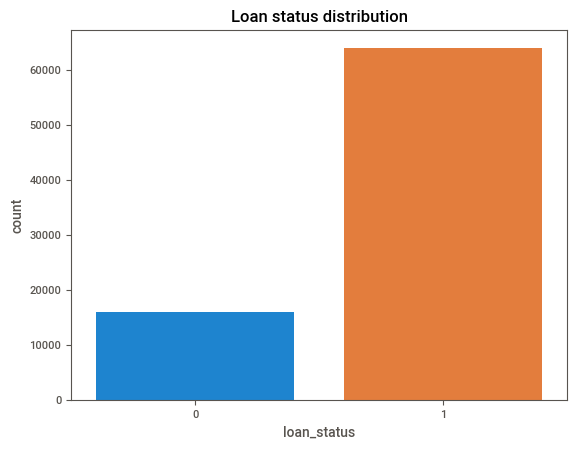

In [37]:
# Let us display paid against defaulted

sns.countplot(x='loan_status', data=data)
plt.title('Loan status distribution')
plt.show()

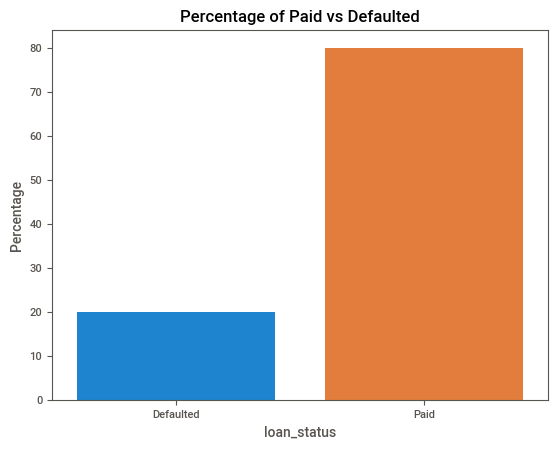

In [38]:
# Display percentage of paid against defaulted

status_percentage = {'loan_status':['Defaulted', 'Paid'], 'Percentage':[defaulted, paid]} 
df_status_percentage = pd.DataFrame(status_percentage) 
sns.barplot(x='loan_status',y='Percentage', data=df_status_percentage)
plt.title('Percentage of Paid vs Defaulted')
plt.show()

   Create dataframes and check the amounts involved in each class

In [39]:
# Create paid dataframe
data_paid = data[data['loan_status'] == 1]
# Create non fraudulent dataframe
data_defaulted = data[data['loan_status'] == 0]

In [40]:

data_paid.shape

(64030, 26)

In [41]:
data_defaulted.shape

(15970, 26)

In [42]:
# Paid transactions

data_paid.loan_amnt.describe()

count    64030.000000
mean     14122.549977
std       8657.016959
min        750.000000
25%       7500.000000
50%      12000.000000
75%      20000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

In [43]:
data_paid.loan_amnt.sum()

904266875

In [44]:
# Defaulted transactions

data_defaulted.loan_amnt.describe()

count    15970.000000
mean     15531.781465
std       8799.439167
min       1000.000000
25%       9000.000000
50%      14387.500000
75%      20125.000000
max      40000.000000
Name: loan_amnt, dtype: float64

In [45]:
data_defaulted.loan_amnt.sum()

248042550

In [46]:
# Perform feature scaling of numerical data

data = feature_scaling(data, numerical)

In [47]:
data.head()

,annual_inc,earliest_cr_line,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,0.129729,-0.238254,1.042009,1.386876,1.386915,4,1,0,1,1.206516,...,-0.357707,2,-0.483524,1.701192,20,1.776470,1502,-1.418662,1,0
1,-0.522259,-1.501316,1.042009,0.756650,0.756674,1,5,0,1,-0.643987,...,-0.357707,2,0.161361,0.343833,5,-0.562914,1082,-1.085581,2,1
2,-0.232487,1.004228,1.042009,-0.661358,-0.661369,1,1,0,1,-0.369451,...,-0.357707,2,0.305076,1.493308,9,-0.562914,1502,-0.752501,1,1
3,0.357809,-2.311982,1.042009,-1.134028,-1.134050,1,1,0,1,-0.853557,...,-0.357707,2,0.094294,0.698459,6,-0.562914,1502,-0.502691,1,1
4,0.057286,0.008016,1.042009,-0.976472,-0.976490,5,5,0,0,2.220835,...,-0.357707,2,0.798298,1.554451,29,1.776470,1289,2.828111,2,1


# Split the dataset into train and test

In [49]:
# Put feature variables into X

# Drop emp_title, addr_state and title columns in addition to the target column loan_status as they are not contributing to our model

X = data.drop(['loan_status','title'], axis=1)

In [50]:
# Put target variable to y
y = data['loan_status']

In [51]:
#Split the dataset into train and test based on the 80-20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

- This is a classification problem. Let us apply Logistic Regression Model

# Logistic Regression

In [52]:
# Instantiate Logistic Regression and fit it.

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred = lr.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred)

0.80325

- We cannot rely on only accuracy score as this dataset is highly imbalanced.

- There are three more metrics:

- Precision: It is the total number of true positives divided by the true positives and false positives. Precision makes sure we don't spot good transactions as fraudulent in our problem.

- Recall: It is the total number of true positives divided by the true positives and false negatives. Recall assures we don't predict fraudulent transactions as all good and therefore get good accuracy with a terrible model.

- F1 Score: It is the harmonic mean of precision and recall. It makes a good average between both metrics.

- We are going to rely on F1 score for this problem

In [55]:
f1_score(y_test,y_pred)

0.8892874727438981

# Let us apply Grid Search to find the best parameters for our Logistic Regression

In [56]:
# Define hyperparameters to search over

parameters = {'C': [0.001,0.01,0.1,1,10,100,1000]}

# Perform a grid search over the hyperparameters

grid_search = GridSearchCV(lr,param_grid=parameters,scoring='f1',cv=10)
grid_search.fit(X_train,y_train)

# Print best hyperparameters and F1 score

print('Best hyperparameters: ',grid_search.best_params_)
print('F1 score: ',grid_search.best_score_)

Best hyperparameters:  {'C': 0.001}
F1 score:  0.8867419707307562


- Let us apply K-fold cross-validation to our Logistic Regression

In [57]:
# Define the number of folds for k-fold cross-validation

k = 10

# Define the k-fold cross-validation object

kf = KFold(n_splits=k,shuffle=True,random_state=1)

# Perform k-fold cross-validation on the model

f1_scores = cross_val_score(lr,X_train,y_train,cv=kf,scoring='f1')

# Print the mean F1 score and standard deviation

print('Mean F1 score: ',f1_scores.mean())

print('Standard deviation: ',f1_scores.std())

Mean F1 score:  0.8865763702778212
Standard deviation:  0.0023391541181641156


- Let us apply Random Forest Classifier to our model

# Random Forest Model

In [58]:
# Instantiate Random Forest Model and fit it

classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [59]:
y_pred2 = classifier.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred2)

0.77625

In [61]:
f1_score(y_test,y_pred2)

0.8689988290398126

- To guard against computing resource crunch, let us apply Principal Component Analysis to our dataset for dimensionality reduction before applying grid search CV to our Random Forest Model

In [62]:
#Lets create a PCA object, with 3 components, i.e we want to create 3 columns from this data.
pca = PCA(n_components=3)
#lets fit the pca on our feature scaled dataframe.
pca.fit(X_train)
#create a dataframe from the newly created PCA results.
X_train_new = pd.DataFrame(pca.transform(X_train), columns=(["new1","new2", "new3"]))

In [63]:
#lets look at our new feature dataset
X_train_new.head()

,new1,new2,new3
0,10.782654,-2.261980,-1.751551
1,-0.673657,-2.518863,2.001009
2,5.636340,-0.216624,-2.785366
3,-5.869163,-0.793471,0.991690
4,-4.685702,-2.406749,0.918657


- Let us apply Grid Search CV to our Random Forest Model

In [65]:
# Define the hyperparameters to search over

parameters = {'n_estimators': [50,100,150],
             'max_depth': [5,10,15],
             'min_samples_split': [2,5,10],
             'min_samples_leaf': [1,2,4]
             }

# Apply grid search to our Random Forest Model

grid_search = GridSearchCV(classifier,param_grid=parameters,cv=5,scoring='f1')
grid_search.fit(X_train_new,y_train)

# Print the best hyperparameters and F1 score

print('Best hyperparameters: ', grid_search.best_params_)
print('F1 score: ', grid_search.best_score_)

KeyboardInterrupt: 

- Our dataset is imbalanced as seen earlier - 80 percent paid back their loan while 20 percent defaulted. We are going to resolve this challenge by employing undersampling technique

# Undersampling
Undersampling involves randomly removing examples from the majority class to make the class proportions more balanced, such as reducing the skew from 1:100 to 1:10, 1:2, or even 1:1. This can help to reduce the bias of the algorithms towards the majority class and improve the performance on the minority class. However, undersampling also has some drawbacks, such as losing potentially valuable information from the majority class and increasing the variance of the model.

In [66]:
# Separate majority (paid) status and minority (defaulted) status

paid_status = data[data['loan_status']==1]
default_status = data[data['loan_status']==0]

In [67]:
# Check the shape of the paid_status dataset

paid_status.shape

(64030, 26)

In [68]:
# Check the shape of the default_status dataset

default_status.shape

(15970, 26)

In [69]:
# Let us undersample the majority (paid_status) dataset

undersampled_paid = resample(paid_status,
                             replace=False,
                             n_samples=len(default_status),
                             random_state=2)

In [70]:
# Let us combine the default_status with undersampled_paid

undersampled_data = pd.concat([default_status,undersampled_paid])

# Shuffle the dataset

undersampled_data = undersampled_data.sample(frac=1,random_state=2)

In [71]:
undersampled_data.head()

,annual_inc,earliest_cr_line,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
68256,0.636831,0.870635,0.202751,-0.976472,-0.976490,3,1,0,0,0.498169,...,-0.357707,2,0.319160,1.297653,15,-0.562914,1502,-0.919041,2,1
60642,0.709274,-0.412330,1.042009,2.489772,2.489837,0,1,0,0,-1.509511,...,-0.357707,2,-0.111455,-0.887165,0,-0.562914,1502,0.663090,1,1
47446,0.015733,-0.053046,1.042009,-0.661358,-0.661369,2,4,0,1,-0.011086,...,-0.357707,2,1.234918,0.384595,12,-0.562914,1502,1.662331,0,1
64196,-0.580214,-1.501316,0.762256,1.071763,1.071794,1,1,0,0,-0.470044,...,-0.357707,4,-0.677219,-1.853213,7,1.776470,2324,-0.336151,1,1
45896,-0.478793,-0.248375,-0.636507,1.386876,1.386915,1,1,0,1,-0.375738,...,-0.357707,2,-0.281573,1.118302,8,-0.562914,1502,0.080199,0,0


In [73]:
# Put feature variables into X

# Drop emp_title, addr_state and title columns in addition to the target column loan_status as they are not contributing to our model

X = undersampled_data.drop(['loan_status','title'], axis=1)

In [74]:
# Put target variable to y

y = undersampled_data['loan_status']

In [75]:
#Split the dataset into train and test based on the 80-20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Logistic Regression for undersampling

In [76]:
# Instantiate Logistic Regression and fit it.

regressor = LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression()

In [77]:
y1_pred = regressor.predict(X_test)

In [78]:
accuracy_score(y_test,y1_pred)

0.6499686912961803

In [79]:
f1_score(y_test,y1_pred)

0.6568446899938613

# Let us apply Grid Search to our Logistic Regression model for undersampling

In [80]:
# Define hyperparameters to search over

parameters = {'C': [0.001,0.01,0.1,1,10,100,1000]}

# Perform a grid search over the hyperparameters

grid_search = GridSearchCV(regressor,param_grid=parameters,scoring='f1',cv=10)
grid_search.fit(X_train,y_train)

# Print best hyperparameters and F1 score

print('Best hyperparameters: ',grid_search.best_params_)
print('F1 score: ',grid_search.best_score_)

Best hyperparameters:  {'C': 0.001}
F1 score:  0.6545413541358975


- Let us apply Random Forest Model to our undersampled data

# Random Forest for undersampling

In [81]:
# Instantiate Random Forest Model and fit it

rclassifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rclassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [82]:
y2_pred = rclassifier.predict(X_test)

In [83]:
accuracy_score(y_test,y2_pred)

0.6092673763306199

In [84]:
f1_score(y_test,y2_pred)

0.5756545392723563

- Let us apply PCA to the undersampled dataset and apply the best parameters - Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [85]:
#Lets create a PCA object, with 3 components, i.e we want to create 3 columns from this data.
pca = PCA(n_components=3)
#lets fit the pca on our feature scaled dataframe.
pca.fit(X_train)
#create a dataframe from the newly created PCA results.
X_train_new = pd.DataFrame(pca.transform(X_train), columns=(["new1","new2", "new3"]))

In [86]:
rfclassifier = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=5,
                                     min_samples_leaf=1,min_samples_split=2,random_state=0)

In [87]:
# Fit the model
rfclassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=50,
                       random_state=0)

In [88]:
y3_pred = rfclassifier.predict(X_test)

In [89]:
f1_score(y_test,y3_pred)

0.6174160120340966

- Let us try Random Forest Model with hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

- We are going to save this model. This will enable us to perform prediction without training everytime

In [90]:
# Create instance of the best model

rfclassifier = RandomForestClassifier(n_estimators=150,criterion='entropy',max_depth=15,
                                     min_samples_leaf=1,min_samples_split=2,random_state=0)

In [91]:
#Train the best model on the entire dataset obtained after undersampling

rfclassifier.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=150,
                       random_state=0)

In [92]:
# Import joblib to be used in saving the model

import joblib

In [93]:
#Save the model

joblib.dump(rfclassifier, "loan_repayment_assessment_model")

['loan_repayment_assessment_model']

# Load the test dataset and perform data preprocessing on it

In [94]:
test_df = pd.read_csv('test_loan_data (1).csv')
test_df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified


In [95]:
# Use shape command on the dataset

test_df.shape

(20000, 27)

In [96]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            20000 non-null  object 
 1   annual_inc            20000 non-null  float64
 2   earliest_cr_line      20000 non-null  object 
 3   emp_length            18742 non-null  object 
 4   emp_title             18622 non-null  object 
 5   fico_range_high       20000 non-null  float64
 6   fico_range_low        20000 non-null  float64
 7   grade                 20000 non-null  object 
 8   home_ownership        20000 non-null  object 
 9   application_type      20000 non-null  object 
 10  initial_list_status   20000 non-null  object 
 11  int_rate              20000 non-null  float64
 12  loan_amnt             20000 non-null  float64
 13  num_actv_bc_tl        18989 non-null  float64
 14  mort_acc              19296 non-null  float64
 15  tot_cur_bal        

In [97]:
# Find the missing values

test_df.isnull().sum()* 100 / len(test_df)

addr_state              0.000
annual_inc              0.000
earliest_cr_line        0.000
emp_length              6.290
emp_title               6.890
fico_range_high         0.000
fico_range_low          0.000
grade                   0.000
home_ownership          0.000
application_type        0.000
initial_list_status     0.000
int_rate                0.000
loan_amnt               0.000
num_actv_bc_tl          5.055
mort_acc                3.520
tot_cur_bal             5.055
open_acc                0.000
pub_rec                 0.000
pub_rec_bankruptcies    0.055
purpose                 0.000
revol_bal               0.000
revol_util              0.065
sub_grade               0.000
term                    0.000
title                   1.235
total_acc               0.000
verification_status     0.000
dtype: float64

In [98]:
# Replace missing values from columns with object datatype with the mode

cols = ['emp_length','emp_title','title']
for col in cols:
    test_df[col].fillna(test_df[col].mode()[0],inplace=True)

In [99]:
# Replace missing values from the remaining columns with float datatype with the mean

colsf = ['num_actv_bc_tl','mort_acc','tot_cur_bal','pub_rec_bankruptcies','revol_util']
for col in colsf:
    test_df[col].fillna(test_df[col].mean(), inplace=True)

In [100]:
# Let us format the emp_length column properly and change the datatype to int

test_df['emp_length'] = test_df['emp_length'].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
test_df['emp_length'] = test_df['emp_length'].apply(lambda x:int(x))

In [101]:
# Convert the term column to numeric value

# Remove the 'months' string from the column
test_df['term'] = test_df['term'].replace(' months','',regex=True)

# Convert the column to numeric format
test_df['term'] = pd.to_numeric(test_df['term'])

In [102]:
# Separate numerical and categorical columns

test_numerical, test_categorical = data_type(test_df)

In [103]:
# Remove the binary columns from the numerical columns

binary_cols = binary_columns(test_df)

test_numerical = [i for i in test_numerical if i not in binary_cols]

In [104]:
# Encode categorical columns

test_df = encoding(test_df, test_categorical)

In [105]:
# Perform feature scaling of numerical data

test_df = feature_scaling(test_df, test_numerical)

In [106]:
test_df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,23,-0.309267,425,-1.479155,8992,0.591656,0.591674,2,2,0,...,-0.365681,-0.349530,2,-0.621159,-1.710522,13,-0.561258,485,-1.159012,1
1,11,0.180936,126,1.032191,8525,-0.510089,-0.510096,1,3,0,...,-0.365681,-0.349530,2,0.648464,0.966904,6,-0.561258,485,0.824706,1
2,42,0.145921,356,1.032191,98,-0.667482,-0.667492,1,1,0,...,-0.365681,-0.349530,1,1.013756,0.962823,6,1.781711,352,1.320636,0
3,4,-0.507683,462,0.753153,7462,-0.824874,-0.824888,2,3,0,...,1.392400,2.324313,2,0.230063,0.722018,10,-0.561258,83,-0.745738,0
4,21,-0.477570,167,1.032191,8743,0.119480,0.119487,1,1,0,...,-0.365681,-0.349530,2,-0.579958,-0.502415,9,-0.561258,5,-0.497773,2


In [107]:
test_df = test_df.drop(['emp_title','addr_state','title'], axis=1)

In [108]:

test_df.head()

,annual_inc,earliest_cr_line,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,...,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,total_acc,verification_status
0,-0.309267,425,-1.479155,0.591656,0.591674,2,2,0,0,0.153094,...,-0.470876,-0.365681,-0.349530,2,-0.621159,-1.710522,13,-0.561258,-1.159012,1
1,0.180936,126,1.032191,-0.510089,-0.510096,1,3,0,0,-0.475586,...,-0.107749,-0.365681,-0.349530,2,0.648464,0.966904,6,-0.561258,0.824706,1
2,0.145921,356,1.032191,-0.667482,-0.667492,1,1,0,1,-0.651616,...,0.618506,-0.365681,-0.349530,1,1.013756,0.962823,6,1.781711,1.320636,0
3,-0.507683,462,0.753153,-0.824874,-0.824888,2,3,0,0,0.088130,...,0.073815,1.392400,2.324313,2,0.230063,0.722018,10,-0.561258,-0.745738,0
4,-0.477570,167,1.032191,0.119480,0.119487,1,1,0,0,0.174050,...,-0.652440,-0.365681,-0.349530,2,-0.579958,-0.502415,9,-0.561258,-0.497773,2


In [109]:
#Load the saved model for use

model = joblib.load("loan_repayment_assessment_model")

In [110]:
# Perform prediction with the saved model on the test_loan dataset

predict = model.predict(test_df)

In [111]:
predict

array([0, 1, 1, ..., 1, 1, 0], dtype=int8)

In [112]:
test_df['predicted'] = pd.DataFrame(predict)

In [113]:
test_df.head()

,annual_inc,earliest_cr_line,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,total_acc,verification_status,predicted
0,-0.309267,425,-1.479155,0.591656,0.591674,2,2,0,0,0.153094,...,-0.365681,-0.349530,2,-0.621159,-1.710522,13,-0.561258,-1.159012,1,0
1,0.180936,126,1.032191,-0.510089,-0.510096,1,3,0,0,-0.475586,...,-0.365681,-0.349530,2,0.648464,0.966904,6,-0.561258,0.824706,1,1
2,0.145921,356,1.032191,-0.667482,-0.667492,1,1,0,1,-0.651616,...,-0.365681,-0.349530,1,1.013756,0.962823,6,1.781711,1.320636,0,1
3,-0.507683,462,0.753153,-0.824874,-0.824888,2,3,0,0,0.088130,...,1.392400,2.324313,2,0.230063,0.722018,10,-0.561258,-0.745738,0,0
4,-0.477570,167,1.032191,0.119480,0.119487,1,1,0,0,0.174050,...,-0.365681,-0.349530,2,-0.579958,-0.502415,9,-0.561258,-0.497773,2,1


In [114]:
test_df.to_csv('predicted.csv',index=False)